In [1]:
import pickle
pickle_in = open("New_Dataset_X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("New_Dataset_y.pickle","rb")
y = pickle.load(pickle_in)

In [2]:
X.shape
h = X.shape[1]
w = X.shape[2]

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
vol = X.shape[1:]
prod = np.prod(vol)
x = X.reshape(X.shape[0],prod)

In [5]:
x.shape

(753, 67500)

In [23]:
Y = []
y = list(y)
for i in range(753):
    if(y[i] == 'Anan'):
        Y.append(0)
    elif(y[i] == 'Angad'):
        Y.append(1)
    else:
        Y.append(2)

Y = np.array(Y,dtype=int)
Y

array([1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1,
       0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1,
       2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0,

In [24]:

from sklearn.decomposition import PCA

pca = PCA(n_components=300)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca_features = pca.transform(x)

In [26]:
import time
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [27]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [30]:
from sklearn.manifold import TSNE
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=400, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.038s...
[t-SNE] Computed neighbors for 753 samples in 1.322s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 5103.918103
[t-SNE] Computed conditional probabilities in 0.759s
[t-SNE] Iteration 50: error = 94.4503555, gradient norm = 0.2840368 (50 iterations in 3.470s)
[t-SNE] Iteration 100: error = 93.9740219, gradient norm = 0.2916718 (50 iterations in 3.665s)
[t-SNE] Iteration 150: error = 92.3807602, gradient norm = 0.2901656 (50 iterations in 3.568s)
[t-SNE] Iteration 200: error = 97.8079605, gradient norm = 0.2714514 (50 iterations in 3.558s)
[t-SNE] Iteration 250: error = 96.5480347, gradient norm = 0.2684722 (50 iterations in 3.424s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.548035
[t-SNE] Iteration 300: error = 1.7627115, gradient norm = 0.0050360 (50 iterations in 2.971s)
[t-SNE] Iteration 350: error = 1.5624609, gradient norm = 0.001331

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.507671, 1.1623443, '0'),
  Text(-1.2530357, -5.543184, '1'),
  Text(1.1847165, 5.632396, '2')])

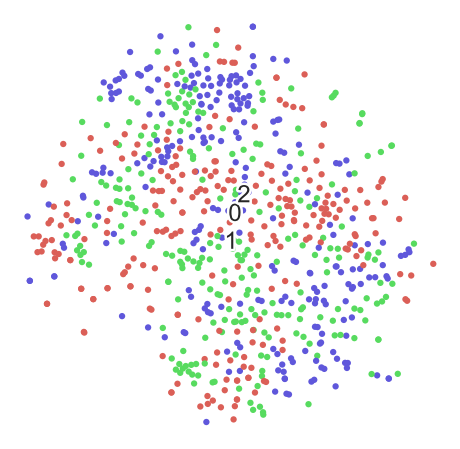

In [31]:
fashion_scatter(tsne,Y)